# Analysis notebook: `alpha_signal_onspill-LH_aq`  

## Define analysis name

In [1]:
ana_label = "alpha_signal_onspill-LH_aq"

## Preamble

In [2]:
from preamble import *

## Load data

In [3]:
!ls ../../output/results/alpha_signal_onspill-LH_aq

alpha_signal_onspill-LH_aq.log	 cut_flow.csv	 hists.h5
alpha_signal_onspill-LH_aq.yaml  efficiency.csv  results.pkl


In [4]:
loader = Load(
    in_path = f"../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../output/results/alpha_signal_onspill-LH_aq


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../output/results/alpha_signal_onspill-LH_aq/results.pkl
[Load] ✅ Loaded cut stats from ../../output/results/alpha_signal_onspill-LH_aq/cut_flow.csv
[Load] ✅ Loaded histograms from ../../output/results/alpha_signal_onspill-LH_aq/hists.h5
[Load] ✅ Loaded efficiency info from ../../output/results/alpha_signal_onspill-LH_aq/efficiency.csv
[Load] ⚠️ File not found: ../../output/results/alpha_signal_onspill-LH_aq/events.parquet
[Load] ⚠️ File not found: ../../output/results/alpha_signal_onspill-LH_aq/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,1475237,100.000000,100.000000,No selection applied
1,is_reco_electron,1473988,99.915336,99.915336,Electron track fits
2,has_trk_front,1449798,98.275599,98.358874,Tracks intersect tracker entrance
3,good_trkqual,792767,53.738281,54.681204,Track fit quality > 0.8
4,within_t0,573169,38.852672,72.299806,t0 at tracker entrance (640 < t_0 < 1650 ns)
5,is_downstream,573165,38.852401,99.999302,Downstream tracks (p_z > 0 at tracker entrance)
6,has_hits,568876,38.561668,99.251699,>20 active tracker hits
7,within_d0,563926,38.226129,99.129863,Distance of closest approach (d_0 < 100 mm)
8,within_pitch_angle,527878,35.782590,93.607672,Extrapolated pitch angle (0.557735 < tan(theta...
9,within_lhr_max,471743,31.977438,89.365914,Loop helix maximum radius (450 < R_max < 680 mm)


### Histograms

In [7]:
draw = Draw()

# Define image directory
img_dir = f"../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../output/images/alpha_signal_onspill-LH_aq/h1o_1x3_mom_windows.png


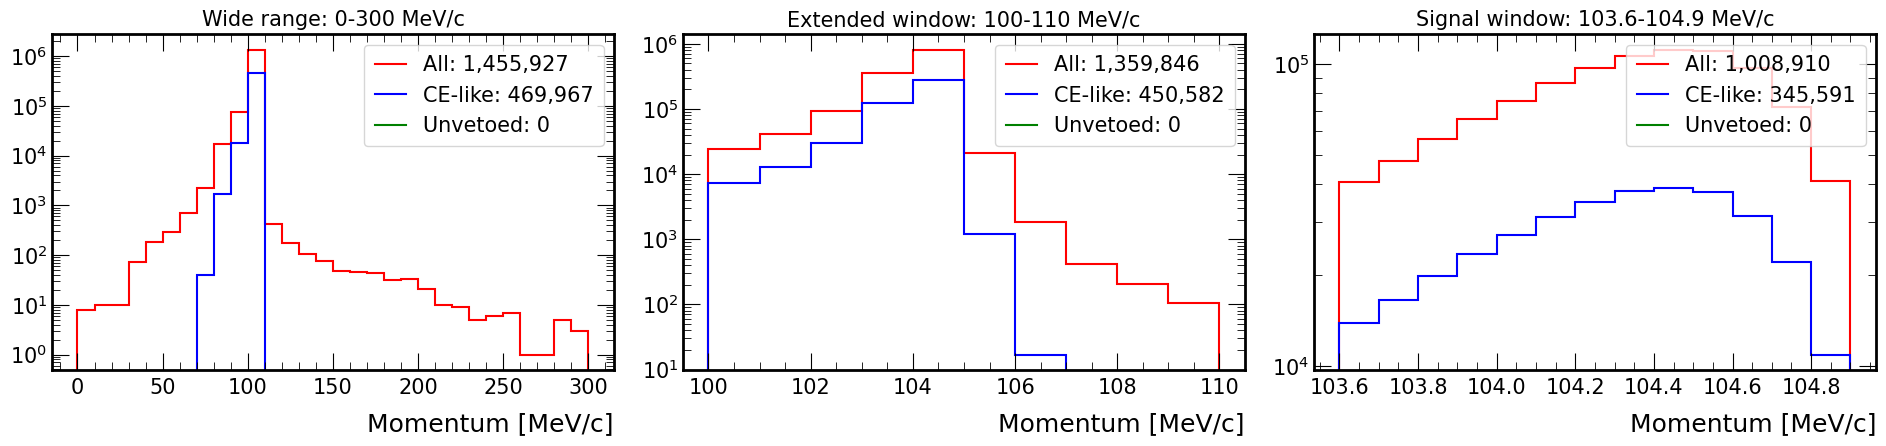

In [8]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../output/images/alpha_signal_onspill-LH_aq/h1o_crv_zwindows.png


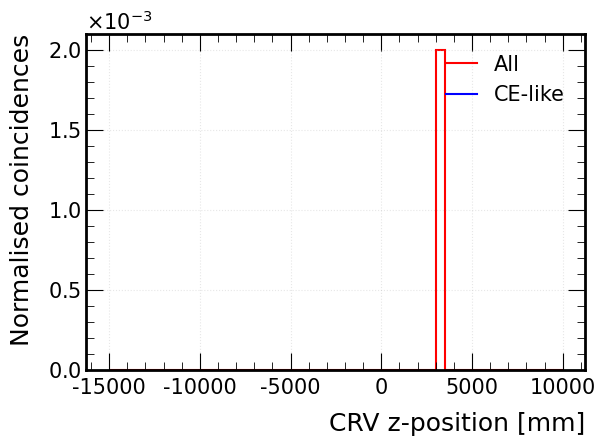

In [9]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_zwindows.png") 

### Efficiency 

In [10]:
display(results["efficiency"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error [%]
0,Signal (wide),469967,4000000,11.75,0.02
1,Signal (ext),450582,4000000,11.26,0.02
2,Signal (sig),345591,4000000,8.64,0.01
3,Veto (wide),0,469967,100.00,0.00
4,Veto (ext),0,450582,100.00,0.00
5,Veto (sig),0,345591,100.00,0.00


### Background event info

In [11]:
print(results["event_info"])

None


In [12]:
if results["events"]:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))